Instructions:

- Download the wine dataset from the UCI Machine Learning Repository

- Load the dataset into a Pandas dataframe.

- Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

- Implement PCA on the preprocessed dataset using the scikit-learn library.

- Determine the optimal number of principal components to retain based on the explained variance ratio.

- Visualise the results of PCA using a scatter plot.

- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

- Interpret the results of PCA and clustering analysis.

#### Download the wine dataset from the UCI Machine Learning Repository

In [1]:
import pandas as pd

# Load the Wine dataset into a Pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue", "OD280/OD315 of Diluted Wines", "Proline"]

In [2]:
### Loading the dataset into a Pandas dataframe.

data = pd.read_csv(url, names=column_names)
data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

####  Spliting the dataset into features and target variables. Perform data

In [4]:
x = data.drop("Class" , axis = 1)
y = data.Class

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

#### Performing data preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
x_train_scaled.shape

(124, 13)

In [8]:
x_test_scaled.shape

(54, 13)

#### Implementing PCA on the preprocessed dataset using the scikit-learn library.

In [9]:
from sklearn.decomposition import PCA

pca = PCA()  # with default k values which is none 
x_train_pca = pca.fit(x_train_scaled)

Determine the optimal number of principal components to retain based on the explained variance ratio.

In [10]:
# Method 1 

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36196226, 0.18763862, 0.11656548, 0.07578973, 0.07043753,
       0.04552517, 0.03584257, 0.02646315, 0.02174942, 0.01958347,
       0.01762321, 0.01323825, 0.00758114])

In [11]:
cumulative_variance = explained_variance_ratio.cumsum()
cumulative_variance

array([0.36196226, 0.54960087, 0.66616635, 0.74195608, 0.81239361,
       0.85791879, 0.89376135, 0.9202245 , 0.94197392, 0.96155739,
       0.9791806 , 0.99241886, 1.        ])

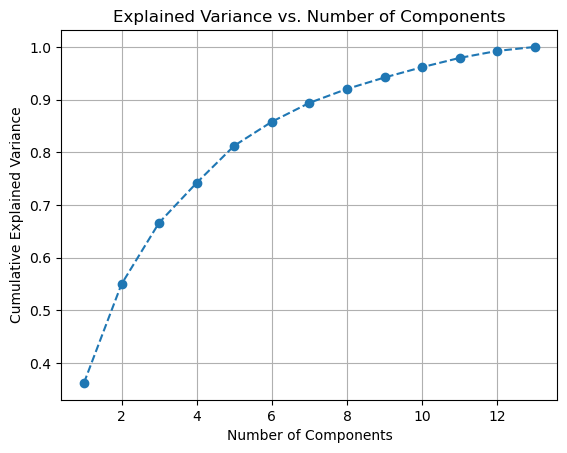

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

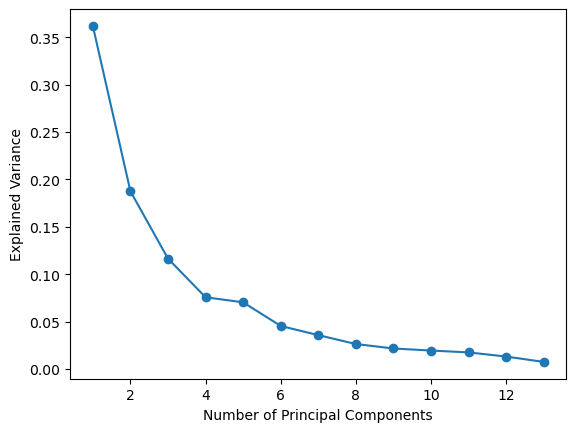

In [13]:
# Method 2 

pca = PCA()
pca.fit(x_train_scaled)  # X is your data
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [14]:
## we are chossing correct value for PCA as 6

pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [15]:
x_train_pca.shape

(124, 6)

#### Performing clustering on the PCA-transformed data using K-Means clustering algorithm.

In [17]:
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
kmeans = KMeans()

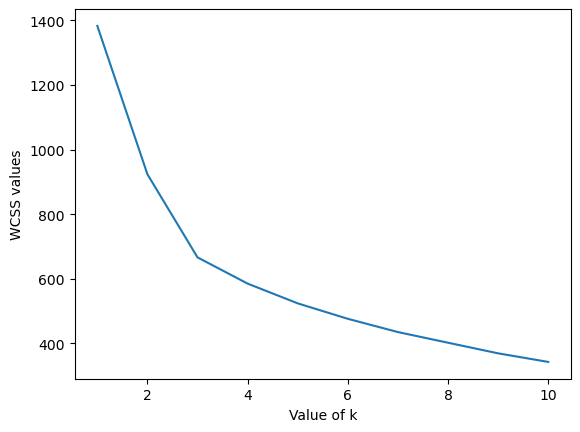

In [18]:
# finding the first parametr for traing (value of k )

wcss = []   

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    kmeans.fit(x_train_pca)
    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1, 11), wcss)
plt.xlabel("Value of k")
plt.ylabel("WCSS values")
plt.show()

From the above elbow method we come to know that the optimal no of K should be 3 

In [19]:
kmeans = KMeans(n_clusters=3, init= 'k-means++')

In [20]:
kmeans.fit(x_train_pca)

KMeans(n_clusters=3)

In [21]:
pred = kmeans.predict(x_train_pca)
pred

array([1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1,
       1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0], dtype=int32)

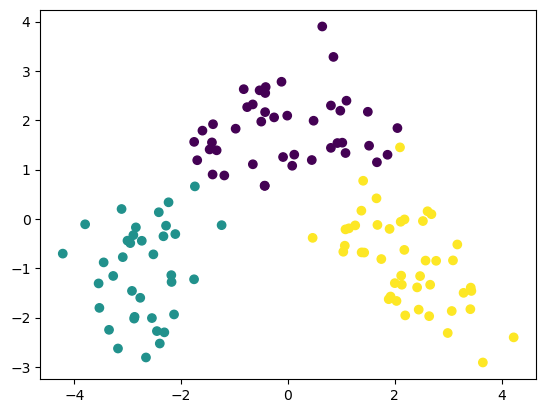

In [22]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1], c = pred )

A table showing the performance metrics for the clustering algorithm.

In [23]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train)
                            # achual data , grouped data(pred value)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[0.6464293818332031,
 0.5654010782761606,
 0.5555852817496801,
 0.534463597230946,
 0.5323359875761018,
 0.5477236516320797,
 0.532854409821284,
 0.534366812456612,
 0.5250812931557097]

#### Interpreting the results of PCA and clustering analysis.

As we did feature decomposition using PCA and we extrate the feature in 6 feature 
then after using k-means custring algorithum we cluster whole data point into 3 clusters